# Trabajo de Grupo


In [92]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [93]:
#load dataset.
#df = pd.read_csv('dataset.txt')
df = pd.read_csv('dataset.csv')
#df.head()

names = df.iloc[0]
print(names)
# Votar la segunda fila de nombres porque ya existe una cabecera X1, X2, ...
df = df.drop(0)

ID                             ID
X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_1
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: 0, dtype: object


In [94]:
# Mostrar los datos despues de votar los nombres.
df.set_index('ID', inplace=True)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a numerico.

In [95]:
#df.describe()
for c in df:
    df[c] = df[c].astype('int64')
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Agregando nuevas variables

In [96]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
df['X24']=df['X13']-df['X12']
df['X25']=df['X14']-df['X13']
df['X26']=df['X15']-df['X14']
df['X27']=df['X16']-df['X15']
df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Pagando deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,...,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,...,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,...,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,...,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


## Dividir entre entrenamiento(24,000), validacion(3,000), test (3,000)

In [97]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

X = df.drop('Y', axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)

In [98]:
# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
dftv = pd.concat([X_entrenval, y_entrenval], axis=1)


## Corregir por desbalancia  
Nuevos dataframes con nombres X_entren_os, y_entren_os  

In [99]:
# Corregir desbalancia.
# Crear nuevo entren dataframe
balance = y_entren.value_counts()
num_muestras = balance[0]-balance[1]
print('balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entren = pd.concat([X_entren, y_entren], axis=1)
deudores = Xy_entren[Xy_entren['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entren_os = pd.concat([Xy_entren, mas_deudores])
X_entren_os = Xy_entren_os.drop('Y', axis=1)
y_entren_os = Xy_entren_os['Y']
print('neuvo balance=\n', y_entren_os.value_counts())


balance=
 0    18647
1     5353
Name: Y, dtype: int64 
num muestras= 13294
neuvo balance=
 1    18647
0    18647
Name: Y, dtype: int64


## Explorando los Datos - con entren y val datos originales  

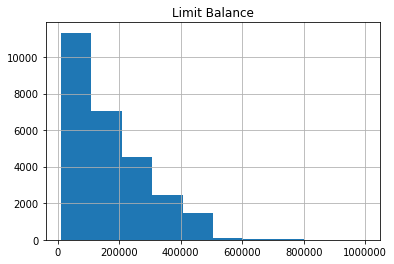

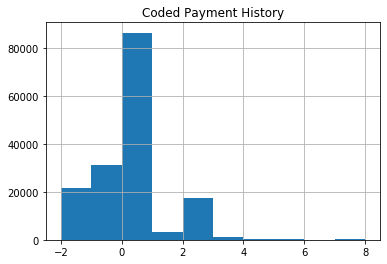

Monthly Bill Statement Amount
count    1.620000e+05
mean     4.488606e+04
std      6.667883e+04
min     -2.090510e+05
25%      2.400000e+03
50%      1.931500e+04
75%      5.715450e+04
max      1.664089e+06
dtype: float64


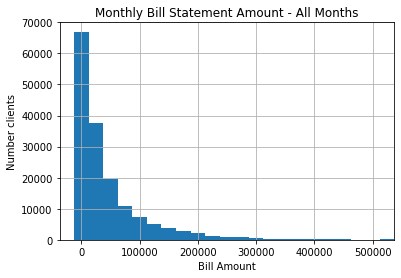

Monthly Amount of Previous Payment
count    1.620000e+05
mean     5.272188e+03
std      1.788870e+04
min      0.000000e+00
25%      3.900000e+02
50%      1.900000e+03
75%      4.524000e+03
max      1.684259e+06
dtype: float64


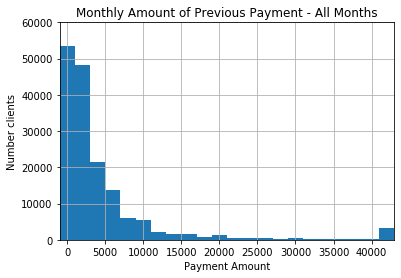

In [100]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn

dftv.X1.hist()
plt.title("Limit Balance")
plt.show()

X6_11 = dftv.X6.append([dftv.X7, dftv.X8, dftv.X9, dftv.X10, dftv.X11])
X6_11.hist()
plt.title("Coded Payment History")
plt.show()

# Histogramas de variables mensuales.
X12_17 = dftv.X12.append([dftv.X13, dftv.X14, dftv.X15, dftv.X16, dftv.X17])
print("Monthly Bill Statement Amount")
print(X12_17.describe())
plt.axis([-37500, 537500, 0, 70000])
binBoundaries = np.linspace(-37500, 537500, 24)
binBoundaries[-1] = 2000000
X12_17.hist(bins=binBoundaries)
plt.title("Monthly Bill Statement Amount - All Months")
plt.xlabel("Bill Amount")
plt.ylabel("Number clients")
plt.show()


X18_23 = dftv.X18.append([dftv.X19, dftv.X20, dftv.X21, dftv.X22, dftv.X23])
print("Monthly Amount of Previous Payment")
print(X18_23.describe())
plt.axis([-1000, 43000, 0, 60000])
binBoundaries = np.linspace(-1000, 43000, 23)
binBoundaries[-1] = 2000000
X18_23.hist(bins=binBoundaries)
plt.title("Monthly Amount of Previous Payment - All Months")
plt.xlabel("Payment Amount")
plt.ylabel("Number clients")
plt.show()

## Función para tomar sqrt de montos  
Montos de dinero tienen mucho obliquidad en sus distribuciones. Entonces, hay que corregir este para mejor oportunidad en entrenamiento.  

El dataframe X_entren_os_tr tiene los mismos datos como X_entren_os pero con montos transformados.

Tambien, el datafram X_val_tr tiene los mismos datos como X_val pero con montos transformados.  

In [101]:
# Compensar por oblicuidad de la distribucion del dinero.
# Función para aplicar a cualquier X (entran, val, test, entran_os)
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
def sqrt_monto(X):
    for x in cols_monto:
        #print(x)
        X.loc[X[x]>0, x] = np.sqrt(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = -np.sqrt(np.absolute((X.loc[X[x]<0,x])))

X_entren_os_tr = X_entren_os.copy()
#print(X_entren_os_tr.describe())
sqrt_monto(X_entren_os_tr)
#print(X_entren_os_tr.describe())
X_val_tr = X_val.copy()
sqrt_monto(X_val_tr)

# Preparar X_test_tr tambien.
X_test_tr = X_test.copy()
sqrt_monto(X_test_tr)

In [102]:
# Ver los variables despues de transformacion.
# X12 ... X23 están transformados.
X_entren_os_tr.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,...,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000,37294.000000
mean,153182.854078,1.593018,1.867003,1.542849,35.509251,0.228589,0.083123,0.029764,-0.037754,-0.101839,...,0.441364,0.422727,0.390297,0.362202,0.347791,0.414804,0.547048,0.397619,0.265211,0.382782
std,126052.747834,0.491278,0.772630,0.522546,9.441668,1.256248,1.339350,1.341916,1.337010,1.302309,...,0.409619,0.399521,0.379538,0.362822,0.358230,23.040327,34.658982,23.041932,1.054598,7.891696
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.395540,-1.025100,-1.374500,-0.876743,-1.509530,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.020520,0.018585,0.015800,0.011513,0.008573,0.034967,0.031692,0.018037,0.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.373550,0.343344,0.306668,0.270946,0.239990,0.056287,0.054648,0.044704,0.039835,0.041192
75%,220000.000000,2.000000,2.000000,2.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.846496,0.815307,0.730105,0.661345,0.634428,0.275551,0.252766,0.174323,0.151804,0.185031
max,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,5.456200,4.558050,4.645500,4.935500,2.694100,4444.333333,5001.000000,4444.333333,129.705128,690.655172


## Función para representar pagos como variables numericos y categoricales
Es un poco problematico en que no todos los algoritmos queren los variables.  
Tampoco, aun que algunos usarán los variables categoricales, no van a querer convertido a 'dummies'.  
Entonces, pongamos en otro dataframe y dejar a los funcciones a convertir a dummies.  
Los variables X6 ... X11 están 'dropped'.  

X_entren_os_tr_pago, X_val_tr_pago, X_test_tr_pago  


Para construir los dummies podemos usar:
```
X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)   
X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)  
X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)  
```







In [103]:
# Construir varibles categorical y numerical por pagos.
cols_pago = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
cols_pago_cat = ['X6cat', 'X7cat', 'X8cat', 'X9cat', 'X10cat', 'X11cat']
def cat_num_pago(X):
    for x in cols_pago:
        xcat = x+'cat'
        X[xcat] = X[x]
        X.loc[X[xcat]>0, xcat] = 1
        X[xcat] = X[xcat].astype('category')
        xnum = x+'num'
        X[xnum] = X[x]
        X.loc[X[xnum]<0, xnum] = 0
        
    
X_entren_os_tr_pago = X_entren_os_tr.copy()    
cat_num_pago(X_entren_os_tr_pago)
X_entren_os_tr_pago.drop(columns=cols_pago, inplace=True)

X_val_tr_pago = X_val_tr.copy()
cat_num_pago(X_val_tr_pago)
X_val_tr_pago.drop(columns=cols_pago, inplace=True)

# Preparar X_text_tr_pago tambien.
X_test_tr_pago = X_test_tr.copy()
cat_num_pago(X_test_tr_pago)
X_test_tr_pago.drop(columns=cols_pago, inplace=True)

#X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
#X_entrenval_os_tr_pago = pd.get_dummies(X_entrenval_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
#X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
#X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)

In [104]:
X_entren_os_tr_pago.head()
#X_val_tr_pago.head()
#X_test_tr_pago.head()

,X1,X2,X3,X4,X5,X12,X13,X14,X15,X16,...,X7cat,X7num,X8cat,X8num,X9cat,X9num,X10cat,X10num,X11cat,X11num
ID,,,,,,,,,,,,,,,,,,,,,
20271,90000,2,3,1,52,221.619043,224.670870,226.715681,0.000000,0.000000,...,0,0,0,0,0,0,-2,0,-2,0
7754,310000,1,2,1,44,62.825154,77.375707,87.971586,94.037227,110.471716,...,0,0,0,0,0,0,0,0,0,0
26307,210000,2,1,2,29,29.512709,165.441833,29.512709,29.512709,45.188494,...,-1,0,-1,0,-1,0,-1,0,1,2
16592,80000,1,3,1,31,166.291912,163.410526,163.878003,166.865215,165.770926,...,1,2,0,0,0,0,0,0,0,0
3509,210000,2,1,2,33,31.144823,47.675990,36.097091,73.382559,42.591079,...,1,2,1,2,-1,0,-1,0,-1,0


## Función de costo adaptado

> El costo adaptado es nuestra medida principal de la calidad.  
Los medidas demas son solo para comparar con otros resultados.  

Con porciento de 'default' de 22.12%, si decimos que todos va a pagar su deuda, vamos a tener un exactitud de 87.88%, pero vamos a tener un costo adaptado de 0.594 por cliente.  Este es nuestra linea base para comparar nuestros resultados.



In [105]:
# Función de costo y exatitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # Mapping from http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    # 0 is the negative category.
    # rows are the actual values.
    # columns are the predicted values.
    # So it is just the opposite orientation of +/-.
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # From this we can calculate the other measures.
    # If cost for each state, we can calculate overall cost.
    # Coefficients de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)


## Mostrar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [106]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combine the procedures
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)



## Capacitar entren+val para usar para entren y test

In [107]:
## Hay que corregir por la desbalancia en entrenval tambien,
## para cuando estamos listo para el 'test'.
balance = y_entrenval.value_counts()
num_muestras = balance[0]-balance[1]
print('entran+val: balance=\n', balance,'\nnum muestras=',num_muestras)
Xy_entrenval = pd.concat([X_entrenval, y_entrenval], axis=1)
deudores = Xy_entrenval[Xy_entrenval['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entrenval_os = pd.concat([Xy_entrenval, mas_deudores])
X_entrenval_os = Xy_entrenval_os.drop('Y', axis=1)
y_entrenval_os = Xy_entrenval_os['Y']
print('entren+val: neuvo balance=\n', y_entrenval_os.value_counts())

# Preparar X_entrenval_os_tr tambien
# Pare cuando hacemos el test.
X_entrenval_os_tr = X_entrenval_os.copy()
sqrt_monto(X_entrenval_os_tr)

# Preparar X_entrenval_os_tr_pago tambien.
X_entrenval_os_tr_pago = X_entrenval_os_tr.copy()
cat_num_pago(X_entrenval_os_tr_pago)
X_entrenval_os_tr_pago.drop(columns=cols_pago, inplace=True)


entran+val: balance=
 0    20993
1     6007
Name: Y, dtype: int64 
num muestras= 14986
entren+val: neuvo balance=
 1    20993
0    20993
Name: Y, dtype: int64


## linea base de costo=0.594

# Neural Network using Keras

## Probar con datos originales. Sin 'oversampling' y sin transformar.  

In [69]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

scaler = StandardScaler()
scaler.fit(X_entren)
_X_entren = scaler.transform(X_entren)
_X_val = scaler.transform(X_val)

default = y_entren.sum()
ratio = float(default/len(y_entren))
print('Default Ratio :',ratio)



Default Ratio : 0.22154166666666666


In [70]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
model.fit(_X_entren, y_entren, epochs=20, validation_data=(_X_val, y_val))



Train on 24000 samples, validate on 3000 samples
Epoch 1/20
24000/24000 [==============================] - 1s 49us/step - loss: 0.4730 - acc: 0.8059 - val_loss: 0.4666 - val_acc: 0.8043
Epoch 2/20
24000/24000 [==============================] - 1s 31us/step - loss: 0.4402 - acc: 0.8178 - val_loss: 0.4568 - val_acc: 0.8117
Epoch 3/20
24000/24000 [==============================] - 1s 31us/step - loss: 0.4322 - acc: 0.8197 - val_loss: 0.4513 - val_acc: 0.8100
Epoch 4/20
24000/24000 [==============================] - 1s 31us/step - loss: 0.4282 - acc: 0.8203 - val_loss: 0.4546 - val_acc: 0.8130
Epoch 5/20
24000/24000 [==============================] - 1s 31us/step - loss: 0.4245 - acc: 0.8221 - val_loss: 0.4521 - val_acc: 0.8163
Epoch 6/20
24000/24000 [==============================] - 1s 31us/step - loss: 0.4239 - acc: 0.8209 - val_loss: 0.4532 - val_acc: 0.8127
Epoch 7/20
24000/24000 [==============================] - 1s 31us/step - loss: 0.4217 - acc: 0.8224 - val_loss: 0.4569 - val_acc:

** Validación **
Exactitud:     0.8076666666666666
Precisión:     0.6408977556109726
Exhaustividad: 0.372463768115942
AUC:           0.6550630528891398
Costo por cliente: 0.684
(3000,) (3000,)


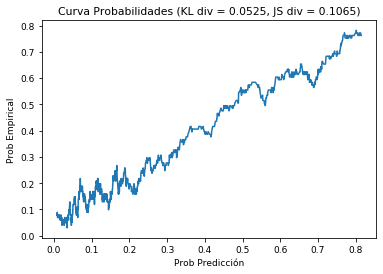

In [71]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob)

## Probar con oversampling  
### Mejoramiento dramatico!!  

In [72]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

scaler = StandardScaler()
scaler.fit(X_entren_os)
_X_entren = scaler.transform(X_entren_os)
_X_val = scaler.transform(X_val)

default = y_entren_os.sum()
ratio = float(default/len(y_entren_os))
print('Default Ratio :',ratio)



Default Ratio : 0.5


In [73]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
model.fit(_X_entren, y_entren_os, epochs=20, validation_data=(_X_val, y_val))




Train on 37366 samples, validate on 3000 samples
Epoch 1/20
37366/37366 [==============================] - 2s 43us/step - loss: 0.5925 - acc: 0.6828 - val_loss: 0.5706 - val_acc: 0.7610
Epoch 2/20
37366/37366 [==============================] - 1s 32us/step - loss: 0.5590 - acc: 0.7136 - val_loss: 0.5861 - val_acc: 0.7377
Epoch 3/20
37366/37366 [==============================] - 1s 32us/step - loss: 0.5492 - acc: 0.7191 - val_loss: 0.5702 - val_acc: 0.7457
Epoch 4/20
37366/37366 [==============================] - 1s 32us/step - loss: 0.5421 - acc: 0.7242 - val_loss: 0.5828 - val_acc: 0.7353
Epoch 5/20
37366/37366 [==============================] - 1s 32us/step - loss: 0.5378 - acc: 0.7261 - val_loss: 0.5396 - val_acc: 0.7713
Epoch 6/20
37366/37366 [==============================] - 1s 31us/step - loss: 0.5330 - acc: 0.7296 - val_loss: 0.5788 - val_acc: 0.7330
Epoch 7/20
37366/37366 [==============================] - 1s 31us/step - loss: 0.5291 - acc: 0.7311 - val_loss: 0.5721 - val_acc:

** Validación **
Exactitud:     0.6853333333333333
Precisión:     0.3897569444444444
Exhaustividad: 0.6507246376811594
AUC:           0.6731978166760775
Costo por cliente: 0.48633333333333334
(3000,) (3000,)


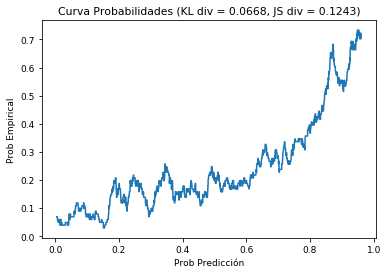

In [74]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob)

## Oversampling y raiz cuadrado de monto de dinero  

In [75]:
# Con sqrt transformados montos
# Un poquito mejor que sin transformar.

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

scaler = StandardScaler()
scaler.fit(X_entren_os_tr)
_X_entren = scaler.transform(X_entren_os_tr)
_X_val = scaler.transform(X_val_tr)

default = y_entren_os.sum()
ratio = float(default/len(y_entren_os))
print('Default Ratio :',ratio)

Default Ratio : 0.5


In [76]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
model.fit(_X_entren, y_entren_os, epochs=20, validation_data=(_X_val, y_val))



Train on 37366 samples, validate on 3000 samples
Epoch 1/40
37366/37366 [==============================] - 2s 44us/step - loss: 0.5875 - acc: 0.6895 - val_loss: 0.6015 - val_acc: 0.7387
Epoch 2/40
37366/37366 [==============================] - 1s 32us/step - loss: 0.5583 - acc: 0.7152 - val_loss: 0.5708 - val_acc: 0.7483
Epoch 3/40
37366/37366 [==============================] - 1s 31us/step - loss: 0.5495 - acc: 0.7206 - val_loss: 0.5767 - val_acc: 0.7433
Epoch 4/40
37366/37366 [==============================] - 1s 31us/step - loss: 0.5429 - acc: 0.7262 - val_loss: 0.5693 - val_acc: 0.7467
Epoch 5/40
37366/37366 [==============================] - 1s 32us/step - loss: 0.5381 - acc: 0.7299 - val_loss: 0.5677 - val_acc: 0.7457
Epoch 6/40
37366/37366 [==============================] - 1s 32us/step - loss: 0.5333 - acc: 0.7312 - val_loss: 0.5746 - val_acc: 0.7367
Epoch 7/40
37366/37366 [==============================] - 1s 32us/step - loss: 0.5291 - acc: 0.7353 - val_loss: 0.5672 - val_acc:

** Validación **
Exactitud:     0.699
Precisión:     0.40093023255813953
Exhaustividad: 0.6246376811594203
AUC:           0.6729249011857708
Costo por cliente: 0.5026666666666667
(3000,) (3000,)


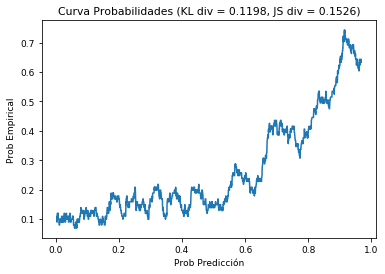

In [77]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob)

## Oversampling, raiz cuadrado del monto de dinero, pago categorical  

In [109]:
# Usar categorias como dummy variables.
X_entren_os_tr_pago = pd.get_dummies(X_entren_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
X_entrenval_os_tr_pago = pd.get_dummies(X_entrenval_os_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
X_val_tr_pago = pd.get_dummies(X_val_tr_pago, prefix = cols_pago, columns=cols_pago_cat)
X_test_tr_pago = pd.get_dummies(X_test_tr_pago, prefix = cols_pago, columns=cols_pago_cat)

In [110]:
# Con sqrt transformados montos y pagos categoricales.
# Quizas no deberia escalar todo!
# Hay que revisarlo.

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
print('num columns=', len(X_entren_os_tr_pago.columns))

scaler = StandardScaler()
scaler.fit(X_entren_os_tr_pago)
_X_entren = scaler.transform(X_entren_os_tr_pago)
_X_val = scaler.transform(X_val_tr_pago)

default = y_entren_os.sum()
ratio = float(default/len(y_entren_os))
print('Default Ratio :',ratio)

num columns= 63
Default Ratio : 0.5


In [111]:
# Verificar que hay todos los datos.
#X_entren_os_tr_pago.head()
_X_entren.shape
# Trata categorical como numeric.

(37294, 63)

In [112]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

n_cols = _X_entren.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
history = model.fit(_X_entren, y_entren_os, epochs=20, validation_data=(_X_val, y_val))



Train on 37294 samples, validate on 3000 samples
Epoch 1/20
37294/37294 [==============================] - 2s 46us/step - loss: 0.5745 - acc: 0.6970 - val_loss: 0.5602 - val_acc: 0.7397
Epoch 2/20
37294/37294 [==============================] - 1s 34us/step - loss: 0.5537 - acc: 0.7112 - val_loss: 0.5669 - val_acc: 0.7520
Epoch 3/20
37294/37294 [==============================] - 1s 36us/step - loss: 0.5470 - acc: 0.7160 - val_loss: 0.5688 - val_acc: 0.7390
Epoch 4/20
37294/37294 [==============================] - 1s 35us/step - loss: 0.5408 - acc: 0.7198 - val_loss: 0.5669 - val_acc: 0.7103
Epoch 5/20
37294/37294 [==============================] - 1s 35us/step - loss: 0.5362 - acc: 0.7230 - val_loss: 0.5478 - val_acc: 0.7307
Epoch 6/20
37294/37294 [==============================] - 1s 35us/step - loss: 0.5316 - acc: 0.7286 - val_loss: 0.5833 - val_acc: 0.7100
Epoch 7/20
37294/37294 [==============================] - 1s 33us/step - loss: 0.5269 - acc: 0.7308 - val_loss: 0.5322 - val_acc:

In [113]:
# Miramos como fue el entrenamiento.

# Si podemos evaluar model contra otro base de datos.... como test!
#model.evaluate(test_images, test_labels)

# history is a dictionary.
history.history.keys()


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### Visualización de la curva de entrenamiento
Al ejecutar model.fit() hemos recibido como variable de retorno el historial del entrenamiento, el cual podemos usar para graficar la curva de entrenamiento con las métricas que hemos configurado.

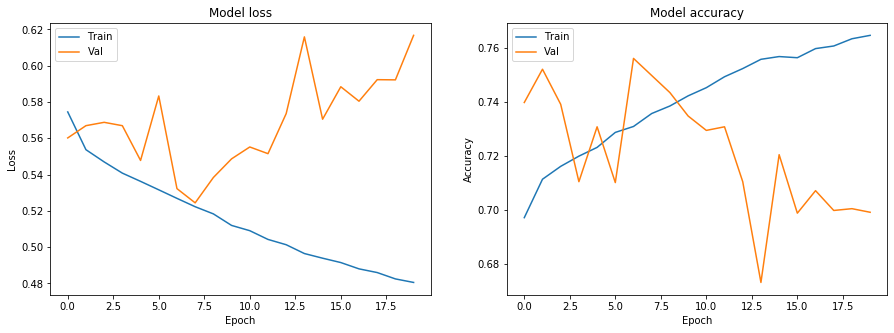

In [114]:
# Adaptado de: https://keras.io/visualization/

plt.figure(figsize=(15,5))
plt.tight_layout()

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


## Visualización del modelo
Keras nos permite visualizar un resumen de nuestro modelo, tanto de manera gráfica como textual:

In [115]:
#from IPython.display import SVG
#from tensorflow.keras.utils import model_to_dot

#SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

In [116]:
model.summary()
# capa de input (None, 45)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                2048      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


** Validación **
Exactitud:     0.699
Precisión:     0.391644908616188
Exhaustividad: 0.6880733944954128
AUC:           0.6950597151505198
Costo por cliente: 0.423
(3000,) (3000,)


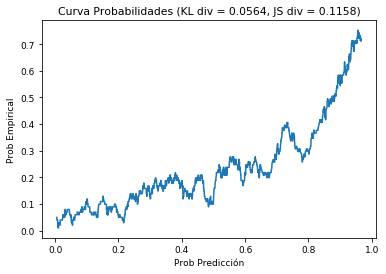

In [117]:
# Check cost measure.
# Predict makes 2-D array of (n,1), squeeze it back to vector (n,).
print('** Validación **')
y_val_prob = np.squeeze(model.predict(_X_val))
y_pred = (y_val_prob > 0.5)
_custom_cost(y_val, y_pred)

#Plot probabilities.
print(y_val.shape, y_val_prob.shape)
mostrarPQ(y_val, y_val_prob)

## Funcción para procesar experimentos de red neuronal  
### Tambien, probar función de perdida adaptada  

In [118]:
# Experimento con funccion de perdida adaptada.
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

def prep_datos_nn(X_entren, X_val, y_entren):
  scaler = StandardScaler()
  scaler.fit(X_entren)
  _X_entren = scaler.transform(X_entren)
  _X_val = scaler.transform(X_val)
  # print proporción 'default'
  default = y_entren.sum()
  ratio = float(default/len(y_entren))
  print('Default Ratio :',ratio)
  return _X_entren, _X_val

In [120]:
# Experimento con loss adaptada.
# Probar con función de perdida, copiado de Keras.
# https://github.com/keras-team/keras/blob/master/keras/losses.py
import keras.backend as K
#cost_coef = 1.25
#def J1_binary_crossentropy(target, output, from_logits=False):
#    if not from_logits:
#        output = K.clip(output, 1e-7, 1 - 1e-7)
#        output = K.log(output / (1 - output))
#    return (cost_coef * target * -K.log(K.sigmoid(output)) +
#            (1 - target) * -K.log(1 - K.sigmoid(output)))
#def J_binary_crossentropy(y_true, y_pred):
#    return K.mean(J1_binary_crossentropy(y_true, y_pred), axis=-1)

def get_J_binary_crossentropy(coef=1.0):
    cost_coef = coef
    def J_binary_crossentropy(y_true, y_pred):
        def J1_binary_crossentropy(target, output, from_logits=False):
            if not from_logits:
                output = K.clip(output, 1e-7, 1 - 1e-7)
                output = K.log(output / (1 - output))
            return (cost_coef * target * -K.log(K.sigmoid(output)) +
                    (1 - target) * -K.log(1 - K.sigmoid(output)))
        return K.mean(J1_binary_crossentropy(y_true, y_pred), axis=-1)
    return J_binary_crossentropy


In [126]:
# Deep Learning Libraries
from keras.layers import Dense
from keras.models import Sequential

def run_nn(_X_entren, y_entren, _X_val, y_val, num_epochs=20, coef=1.0):
  print('neural net con cost_coef=', coef)

  n_cols = _X_entren.shape[1]

  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='adam',loss=get_J_binary_crossentropy(coef), metrics=['acc'])
  #model.compile(optimizer='adam',loss=J_binary_crossentropy, metrics=['acc'])
  #model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
  #model.compile(optimizer='adam',loss=get_weighted_loss(C), metrics=['acc'])

  model.fit(_X_entren, y_entren, epochs=num_epochs, validation_data=(_X_val, y_val))
  
  y_val_prob = np.squeeze(model.predict(_X_val))
  return y_val_prob


In [127]:
# Check cost measure.

def calc_costo(y_val, y_val_prob):
  print('** Validación **')
  y_pred = (y_val_prob > 0.5)
  _custom_cost(y_val, y_pred)

  #Plot probabilities.
  print(y_val.shape, y_val_prob.shape)
  mostrarPQ(y_val, y_val_prob)

Default Ratio : 0.5
neural net con cost_coef= 1.0
Train on 37294 samples, validate on 3000 samples
Epoch 1/20
37294/37294 [==============================] - 2s 48us/step - loss: 0.5906 - acc: 0.6858 - val_loss: 0.5612 - val_acc: 0.7503
Epoch 2/20
37294/37294 [==============================] - 1s 34us/step - loss: 0.5619 - acc: 0.7084 - val_loss: 0.5900 - val_acc: 0.7330
Epoch 3/20
37294/37294 [==============================] - 1s 33us/step - loss: 0.5539 - acc: 0.7118 - val_loss: 0.5384 - val_acc: 0.7683
Epoch 4/20
37294/37294 [==============================] - 1s 32us/step - loss: 0.5491 - acc: 0.7148 - val_loss: 0.5408 - val_acc: 0.7603
Epoch 5/20
37294/37294 [==============================] - 1s 32us/step - loss: 0.5452 - acc: 0.7188 - val_loss: 0.5540 - val_acc: 0.7600
Epoch 6/20
37294/37294 [==============================] - 1s 33us/step - loss: 0.5411 - acc: 0.7201 - val_loss: 0.5747 - val_acc: 0.7313
Epoch 7/20
37294/37294 [==============================] - 1s 33us/step - loss: 

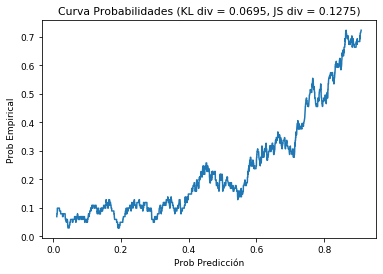

In [128]:
# Run the NN
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20)
calc_costo(y_val, y_val_prob)

Default Ratio : 0.5
neural net con cost_coef= 5.0
Train on 37294 samples, validate on 3000 samples
Epoch 1/20
37294/37294 [==============================] - 2s 51us/step - loss: 1.2120 - acc: 0.5206 - val_loss: 1.3396 - val_acc: 0.2787
Epoch 2/20
37294/37294 [==============================] - 1s 33us/step - loss: 1.1327 - acc: 0.5488 - val_loss: 1.3121 - val_acc: 0.3010
Epoch 3/20
37294/37294 [==============================] - 1s 33us/step - loss: 1.1181 - acc: 0.5633 - val_loss: 1.2940 - val_acc: 0.3347
Epoch 4/20
37294/37294 [==============================] - 1s 33us/step - loss: 1.1055 - acc: 0.5722 - val_loss: 1.3390 - val_acc: 0.3150
Epoch 5/20
37294/37294 [==============================] - 1s 33us/step - loss: 1.0920 - acc: 0.5812 - val_loss: 1.2965 - val_acc: 0.3380
Epoch 6/20
37294/37294 [==============================] - 1s 33us/step - loss: 1.0801 - acc: 0.5898 - val_loss: 1.3000 - val_acc: 0.3537
Epoch 7/20
37294/37294 [==============================] - 1s 33us/step - loss: 

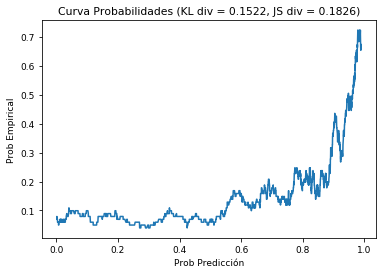

In [130]:
# Run the NN with cost coefficient = 5.0.  Should see something! 
# Aumento grande en exhaustividad, pero precisión bajó mucho.
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr, X_val_tr, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=5.0)
calc_costo(y_val, y_val_prob)

Default Ratio : 0.5
neural net con cost_coef= 2.5
Train on 37294 samples, validate on 3000 samples
Epoch 1/20
37294/37294 [==============================] - 2s 57us/step - loss: 0.8800 - acc: 0.6285 - val_loss: 0.9400 - val_acc: 0.4633
Epoch 2/20
37294/37294 [==============================] - 1s 38us/step - loss: 0.8484 - acc: 0.6398 - val_loss: 0.9506 - val_acc: 0.4577
Epoch 3/20
37294/37294 [==============================] - 1s 36us/step - loss: 0.8371 - acc: 0.6475 - val_loss: 0.8757 - val_acc: 0.5510
Epoch 4/20
37294/37294 [==============================] - 1s 35us/step - loss: 0.8285 - acc: 0.6550 - val_loss: 0.9274 - val_acc: 0.4640
Epoch 5/20
37294/37294 [==============================] - 1s 35us/step - loss: 0.8198 - acc: 0.6630 - val_loss: 0.9309 - val_acc: 0.4777
Epoch 6/20
37294/37294 [==============================] - 1s 35us/step - loss: 0.8125 - acc: 0.6654 - val_loss: 0.8848 - val_acc: 0.5317
Epoch 7/20
37294/37294 [==============================] - 1s 35us/step - loss: 

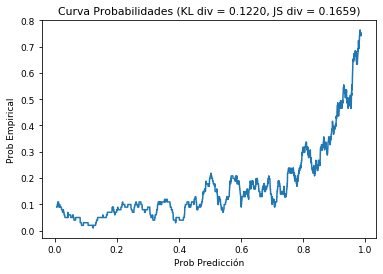

In [132]:
# Run the NN - with dummy variables.
_X_entren, _X_val = prep_datos_nn(X_entren_os_tr_pago, X_val_tr_pago, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20, coef=2.5)
calc_costo(y_val, y_val_prob)

Default Ratio : 0.5
Train on 37322 samples, validate on 3000 samples
Epoch 1/20
37322/37322 [==============================] - 2s 61us/step - loss: 0.6581 - acc: 0.6774 - val_loss: 0.6749 - val_acc: 0.6797
Epoch 2/20
37322/37322 [==============================] - 2s 49us/step - loss: 0.6268 - acc: 0.7058 - val_loss: 0.6485 - val_acc: 0.7113
Epoch 3/20
37322/37322 [==============================] - 2s 48us/step - loss: 0.6144 - acc: 0.7128 - val_loss: 0.6390 - val_acc: 0.6957
Epoch 4/20
37322/37322 [==============================] - 2s 47us/step - loss: 0.6060 - acc: 0.7198 - val_loss: 0.6121 - val_acc: 0.7170
Epoch 5/20
37322/37322 [==============================] - 2s 48us/step - loss: 0.6003 - acc: 0.7232 - val_loss: 0.5980 - val_acc: 0.7333
Epoch 6/20
37322/37322 [==============================] - 2s 47us/step - loss: 0.5951 - acc: 0.7279 - val_loss: 0.6453 - val_acc: 0.6787
Epoch 7/20
37322/37322 [==============================] - 2s 46us/step - loss: 0.5909 - acc: 0.7292 - val_los

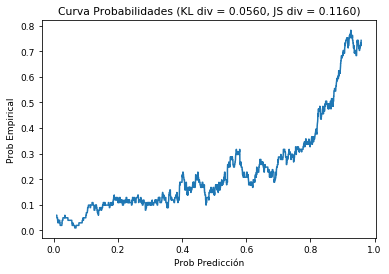

In [0]:
# Run the NN - without sqrt transform
_X_entren, _X_val = prep_datos_nn(X_entren_os, X_val, y_entren_os)
y_val_prob = run_nn(_X_entren, y_entren_os, _X_val, y_val, num_epochs=20)
calc_costo(y_val, y_val_prob)